In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [1]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate, x, y):
        # initialize weights and biases
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.weights2 = np.random.randn(hidden_size, output_size)
        self.bias1 = np.random.randn(hidden_size)
        self.bias2 = np.random.randn(output_size)
        self.learning_rate = learning_rate
        self.inputs = x 
        self.outputs = y
        self.num_epochs = 1500
        self.loss = []
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def relu(self, x):
        return(np.maximum(0, x))
        
    def relu_derivative(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1-np.tanh(x)**2
    
    def feedforward(self):
        # feedforward through the first layer
        self.layer1 = self.sigmoid(np.dot(self.inputs, self.weights1) + self.bias1)
        # feedforward through the second layer
        self.output_bar = self.sigmoid(np.dot(self.layer1, self.weights2) + self.bias2)
        return self.output_bar
    
    def backprop(self):
        # calculate the error for the output layer
        output_error = self.outputs - self.output_bar
        output_delta = output_error * self.sigmoid_derivative(self.output_bar)
        # calculate the error for the hidden layer
        hidden_error = np.dot(output_delta, self.weights2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.layer1)
        # update the weights and biases
        self.weights2 += np.dot(self.layer1.T, output_delta) * self.learning_rate
        self.weights1 += np.dot(self.inputs.T, hidden_delta) * self.learning_rate
        self.bias2 += np.sum(output_delta) * self.learning_rate
        self.bias1 += np.sum(hidden_delta) * self.learning_rate

    
    def loss_cal(self): 
        self.loss.append(np.mean(np.square(self.outputs - self.output_bar)))

    def train(self):
        """
        Train the neural network using the given inputs and outputs
        inputs: array of inputs of shape (number of inputs, number of examples)
        outputs: array of outputs of shape (number of outputs, number of examples)
        learning_rate: float, the learning rate to use for the update
        num_epochs: int, the number of times to train the network on the entire dataset
        """
        for epoch in range(self.num_epochs):
            # Feedforward and backpropagation
            self.feedforward()
            self.backprop()
            self.loss_cal()


```np.random.randn```: Randomly initialize weights and bias following a normal distribution with mean =0, std = 1

In [12]:
if __name__ == "__main__":
 X = np.array([[0,0,1],
 [0,1,1],
 [1,0,1],
 [1,1,1]])
 y = np.array([[0],[1],[1],[0]])
 nn = NeuralNetwork(3, 4, 1, 1, X, y)
 nn.train()

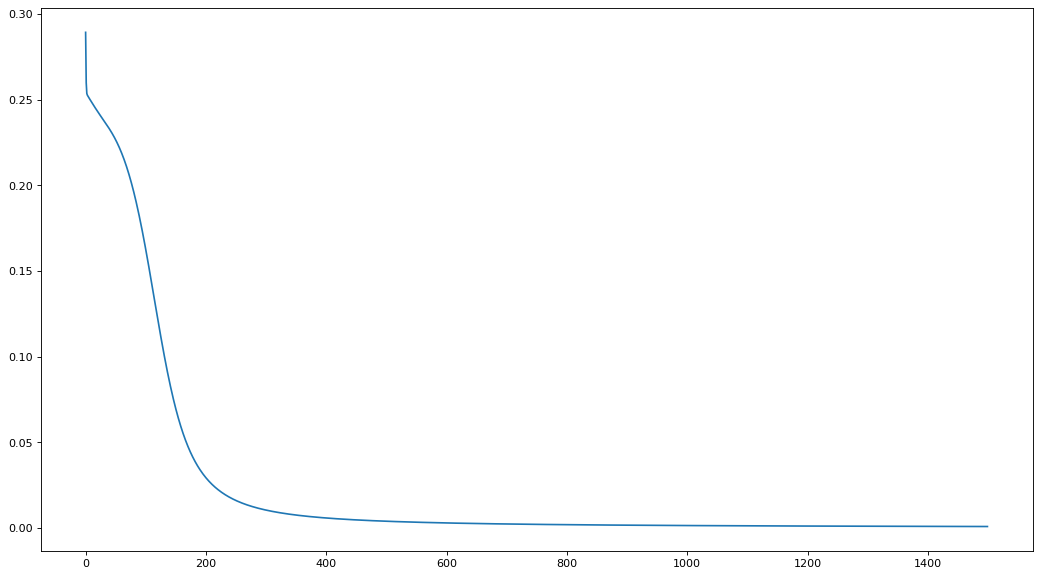

In [14]:
figure(figsize=(16, 9), dpi=80)
x = np.arange(0, 1500, 1)
plt.plot(x, nn.loss)